<a href="https://colab.research.google.com/github/deepak-ucfknight/Machine_Learning_Spring19/blob/master/Extending_keras_network_with_connected_component_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras import backend as K
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from skimage import util 
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Input
from keras import layers
from keras import Model

In [97]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

x_train = x_train / 255;
x_test  = x_test  / 255;




for i in range(len(x_train)):
  a = x_train[i]
  for row in range(len(a)):
    for col in range(len(a[row])):
      if(a[row,col] != 0):
        a[row,col] = 1
        
for i in range(len(x_test)):
  a = x_test[i]
  for row in range(len(a)):
    for col in range(len(a[row])):
      if(a[row,col] != 0):
        a[row,col] = 1
  

(60000, 28, 28)


In [0]:
image_to_visualize = 8
index = -1

for i in range(len(y_train)):
  if y_train[i] == image_to_visualize:
    index = i

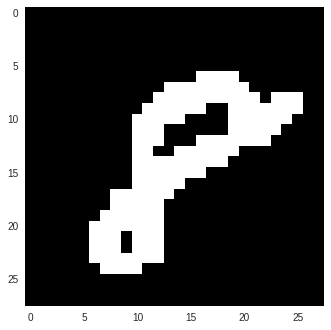

In [99]:

inverted_img = util.invert(x_train[index])
plt.grid(None)
plt.imshow(inverted_img)

In [100]:
connected_components_train = np.zeros_like(y_train)
connected_components_test  = np.zeros_like(y_test)

print(connected_components_train.shape[0])

60000


In [0]:
# use scipy ndimage to get connected components easily
for i in range(len(connected_components_train)):
  labeled, nr_objects = ndimage.label(util.invert(x_train[i]))
  connected_components_train[i] = nr_objects
  
for i in range(len(connected_components_test)):
  labeled, nr_objects = ndimage.label(util.invert(x_test[i]))
  connected_components_test[i] = nr_objects

In [0]:
# Manual recursive dfs search to find connected components -  this is very slow
# for i in range(len(connected_components_train)):
  
#   image = util.invert(x_train[i])
#   dx = [-1,0,1,1,1,0,-1,-1]
#   dy = [1,1,1,0,-1,-1,-1,0]
  
#   labelled = 1
  
#   labelled_image = np.zeros_like(image)
  
#   for row in range(len(image)):
#     for col in range(len(image[row])):
#         if image[row][col] ==  1 and labelled_image[row][col] == 0:
#             dfs(row, col, labelled)
#             labelled = labelled + 1
  
#   connected_components_train[i] = labelled - 1
  
  
  
# for i in range(len(connected_components_test)):
  
#   image = util.invert(x_test[i])
#   dx = [-1,0,1,1,1,0,-1,-1]
#   dy = [1,1,1,0,-1,-1,-1,0]
  
#   labelled = 1
  
#   labelled_image = np.zeros_like(image)
  
  
#   for row in range(len(image)):
#     for col in range(len(image[row])):
#         if image[row][col] ==  1 and labelled_image[row][col] == 0:
#             dfs(row, col, labelled)
#             labelled = labelled + 1
  
#   connected_components_test[i] = labelled - 1

In [0]:
def dfs(x,y,c):
    labelled_image[x][y] = c
    for i in range(8):
        nx = x+dx[i]
        ny = y+dy[i]
        if nx >= 0 and ny >= 0 and nx <28  and ny <28:
            if image[nx][ny] == 1 and labelled_image[nx][ny] == 0:
                dfs(nx, ny, c)

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
rows = 28
cols = 28
num_classes = 10
batch_size = 32
input_dims = rows*cols
handcrafted_feature = 1

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, rows, cols)
    x_test = x_test.reshape(x_test.shape[0], 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
    x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)
    input_shape = (rows, cols, 1)
    
x_train = x_train / 255;
x_test = x_test / 255;

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
y_train = y_train
y_test = y_test

In [0]:

input_shape = Input((input_dims,))
connected_component_feature = Input((handcrafted_feature,))

image_vector = Dense(64, activation='sigmoid')(input_shape)

model_final  = layers.add([image_vector, connected_component_feature])   

model_final  = Dense(10, activation='softmax')(model_final)

model_final  = Model([input_shape, connected_component_feature], model_final)


In [109]:
sgd = optimizers.SGD(lr=0.1)

model_final.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model_final.fit([x_train, connected_components_train], y_train, nb_epoch=20, batch_size=batch_size)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/20
60000/60000 [==============================] - 4s 62us/step - loss: 1.2034 - acc: 0.7499
Epoch 2/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.3122 - acc: 0.9075
Epoch 3/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2571 - acc: 0.9242
Epoch 4/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2294 - acc: 0.9312
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2074 - acc: 0.9377
Epoch 6/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1895 - acc: 0.9442
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1751 - acc: 0.9479
Epoch 8/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1622 - acc: 0.9515
Epoch 9/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.1516 - acc: 0.9542
Epoch 10/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.1424 - acc: 0.9573

In [110]:
score = model_final.evaluate([x_test,connected_components_test], y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.10862038991488517
Test accuracy: 0.9678
